# **RNN, LSTM**

## **1. Introduction**

Trong bài toán Seq2Seq, thông tin xửa lí có dạng chuỗi: 
- Dịch máy (Machine Translation)
- Nhận dạng giọng nói
- Mô tả hình ảnh: RNN kết hợp cùng CNN để sinh ra mô tả hình ảnh chưa được gán nhãn
- Mô hình hóa ngôn ngữ và sinh văn bản
Những bài toán đòi hỏi những thông tin phía trước thì các mạng Neural Network truyền thông không làm được -> Mạng hồi quy (Recurrent Neural Network) ra đời cho phép thông tin có thể lưu giữ lại được

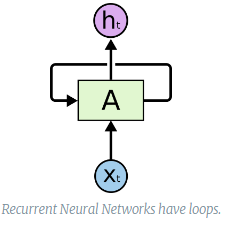

Hình vẽ trên mô tả một đoạn của mạng nơ-ron hồi quy A với đầu vào là vector $x_t$ và đầu ra là một giá trị ẩn $h_t$. Một vòng lặp cho phép thông tin có thể được truyền từ bước này qua bước khác của mạng nơ-ron.

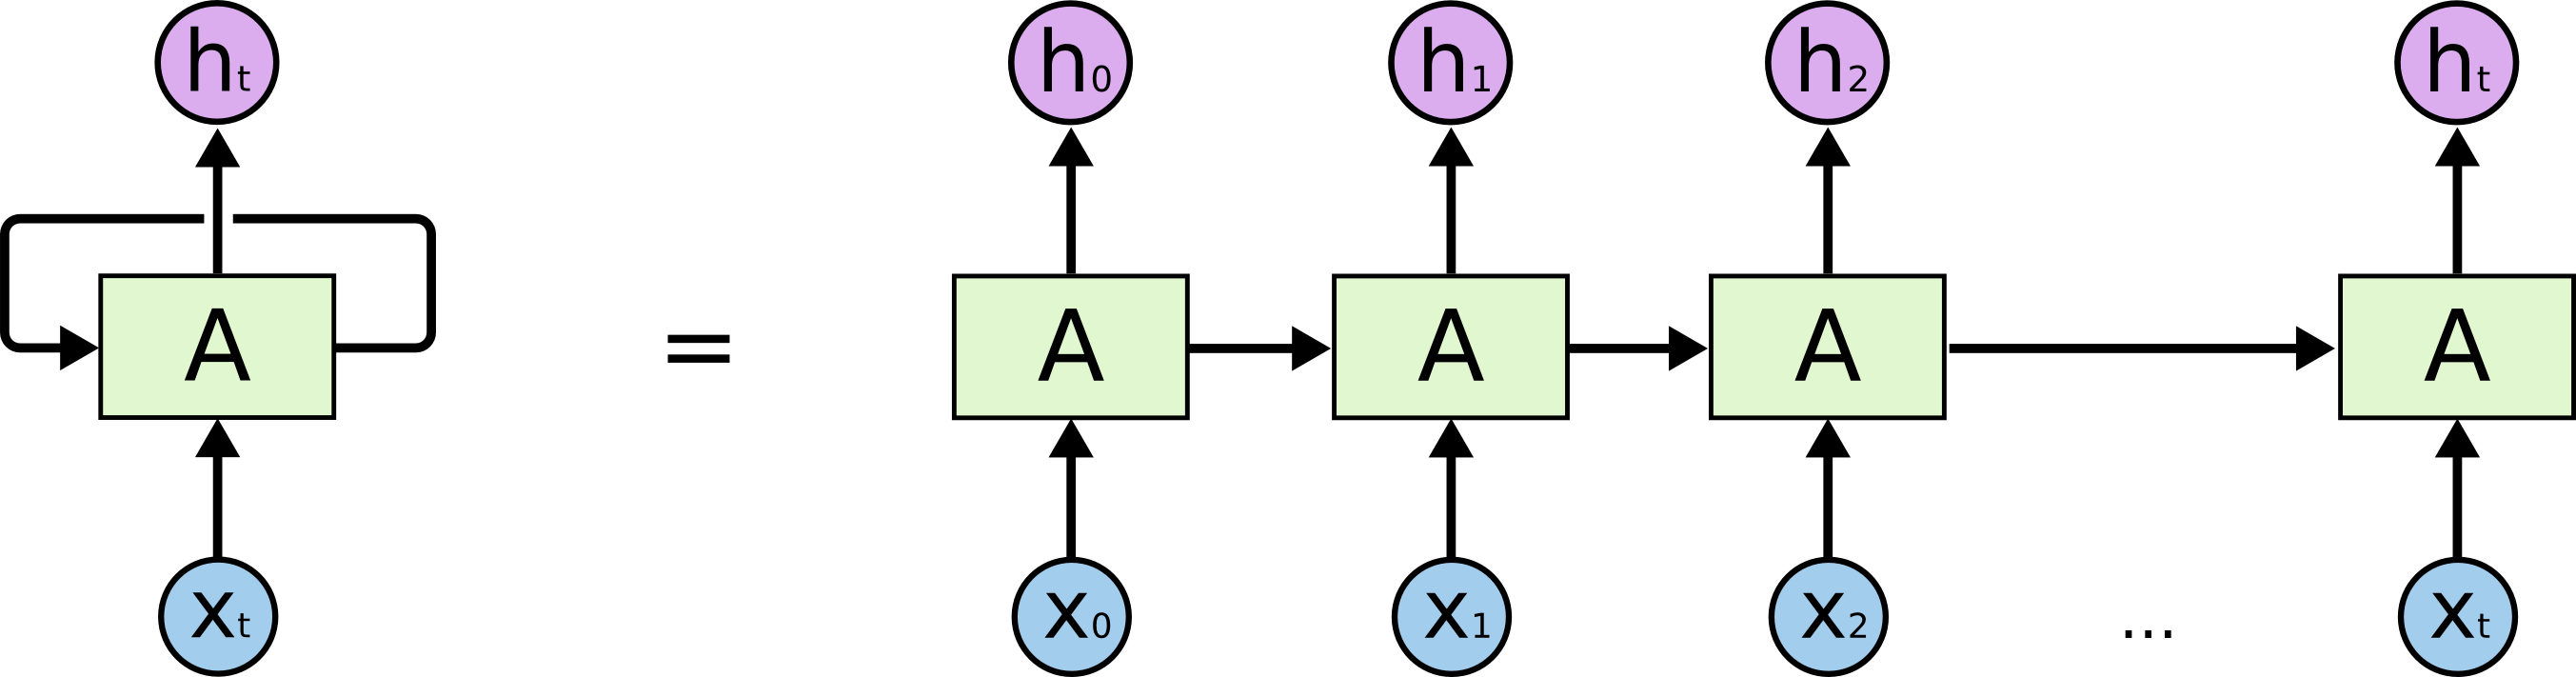

Chuỗi lặp lại các mạng này chính là phân giải của mạng nơ-ron hồi quy, các vòng lặp khiến chúng tạo thành một chuỗi danh sách các mạng sao chép nhau.

## **2. Vấn đề phụ thuộc xa**

Ví dụ: “các đám mây trên bầu trời” thì ta chỉ cần đọc tới “các đám may trên bầu” là đủ biết được chữ tiếp theo là “trời” rồi. Trong tình huống này, khoảng cách tới thông tin có được cần để dự đoán là nhỏ, nên RNN hoàn toàn có thể học được.

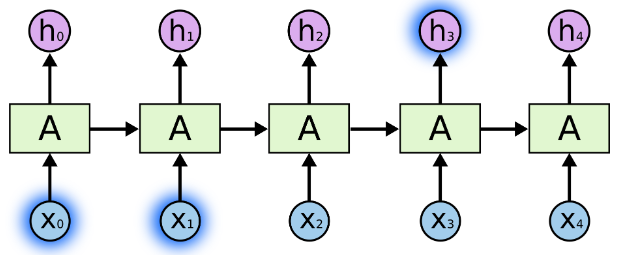

Nhiều tình huống ta buộc phải sử dụng nhiều ngữ cảnh hơn để suy luận. Ví dụ, dự đoán chữ cuối cùng trong đoạn: “I grew up in France… I speak fluent French.”. Rõ ràng là các thông tin gần (”I speak fluent”) chỉ có phép ta biết được đằng sau nó sẽ là tên của một ngôn ngữ nào đó, còn không thể nào biết được đó là tiếng gì. Muốn biết là tiếng gì, thì ta cần phải có thêm ngữ cảnh “I grew up in France” nữa mới có thể suy luận được. Rõ ràng là khoảng cách thông tin lúc này có thể đã khá xa rồi.

Khoảng cách càng lớn dần thì RNN bắt đầu không thể nhớ và học được nữa.

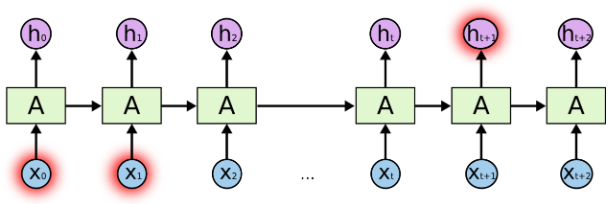

## **3. Mạng LSTM**

LSTM (Long Short Term Memory networks) là một dạng đặc biệt của RNN, có khả năng học các phụ thuộc xa.

LSTM được thiết kế để tránh được vấn đề phụ thuộc xa (long-term dependency). Việc nhớ thông tin trong suốt thời gian dài là đặc tính mặc định của chúng, chứ ta không cần phải huấn luyện nó để có thể nhớ được. 

Mọi mạng hồi quy đều có dạng là một chuỗi các mô-đun lặp đi lặp lại của mạng nơ-ron. Với mạng RNN chuẩn, các mô-dun này có cấu trúc rất đơn giản, thường là một tầng $tanh$.

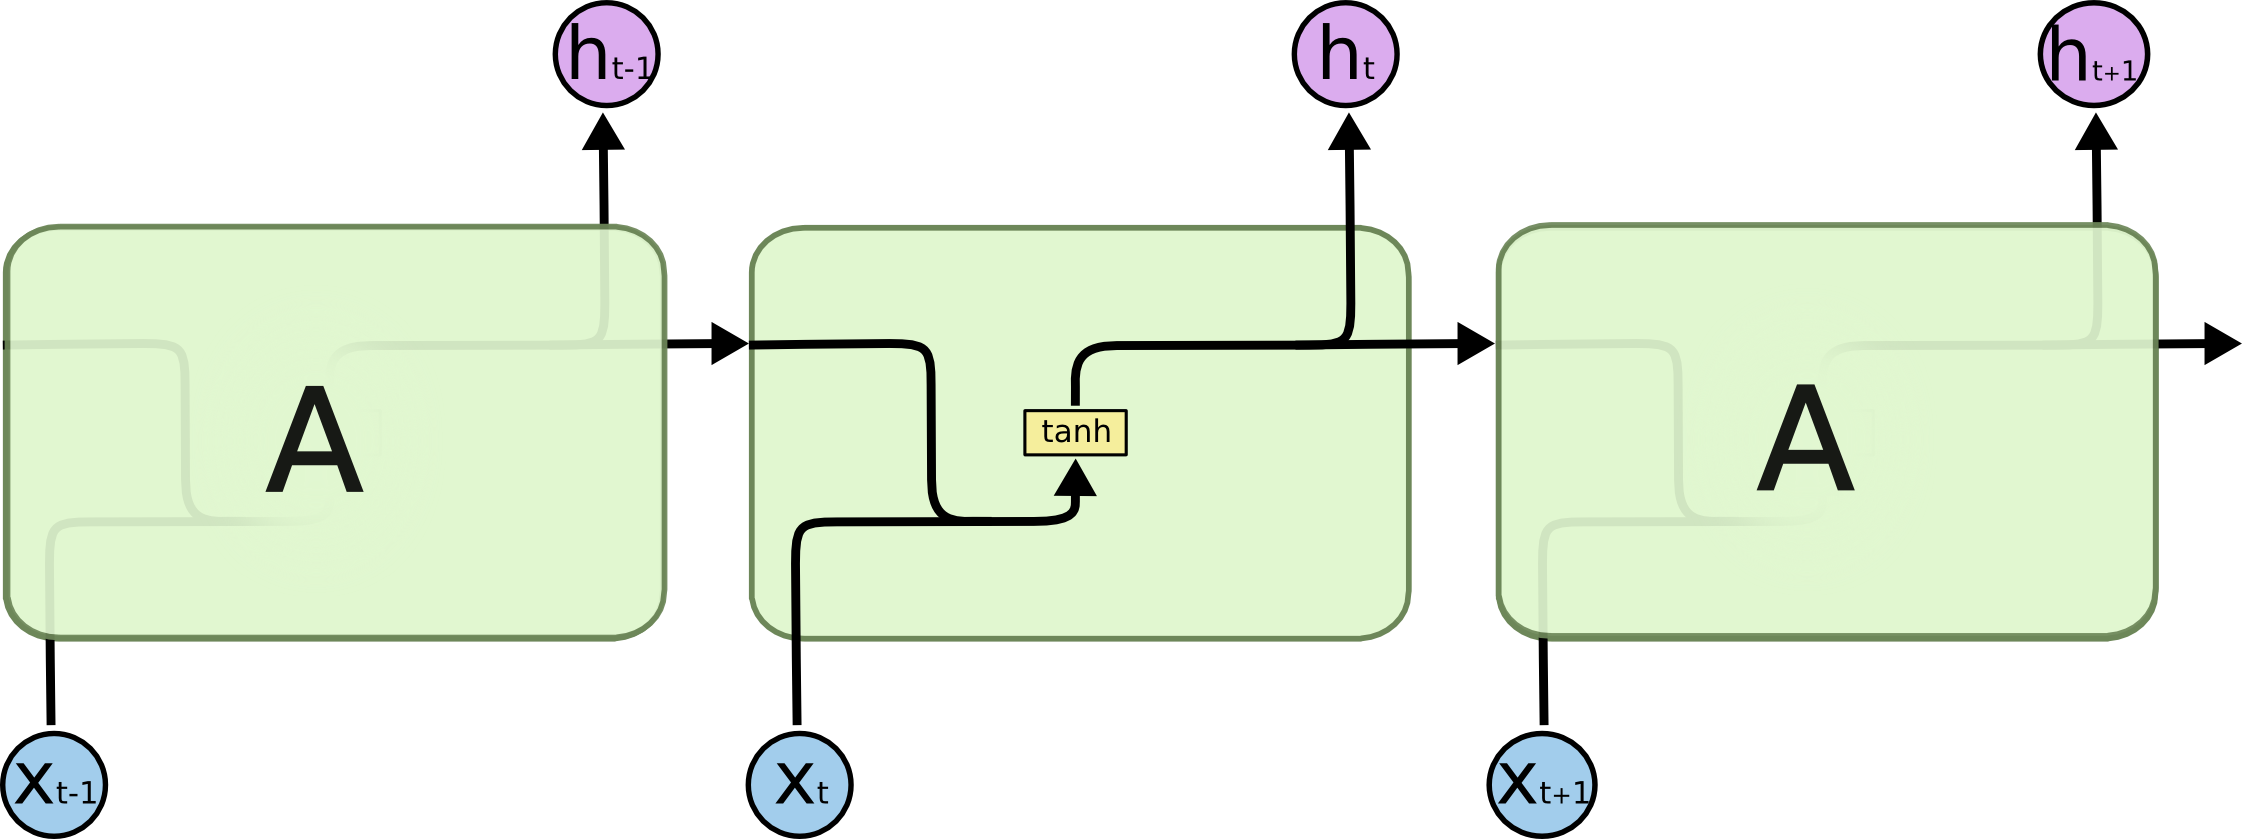

**Hình 3:** Sự lặp lại kiến trúc module trong mạng RNN chứa một tầng ẩn

LSTM có 4 tầng ẩn (3 sigmoid và 1 tanh) tương tác với nhau một theo một cấu trúc đặc biệt.

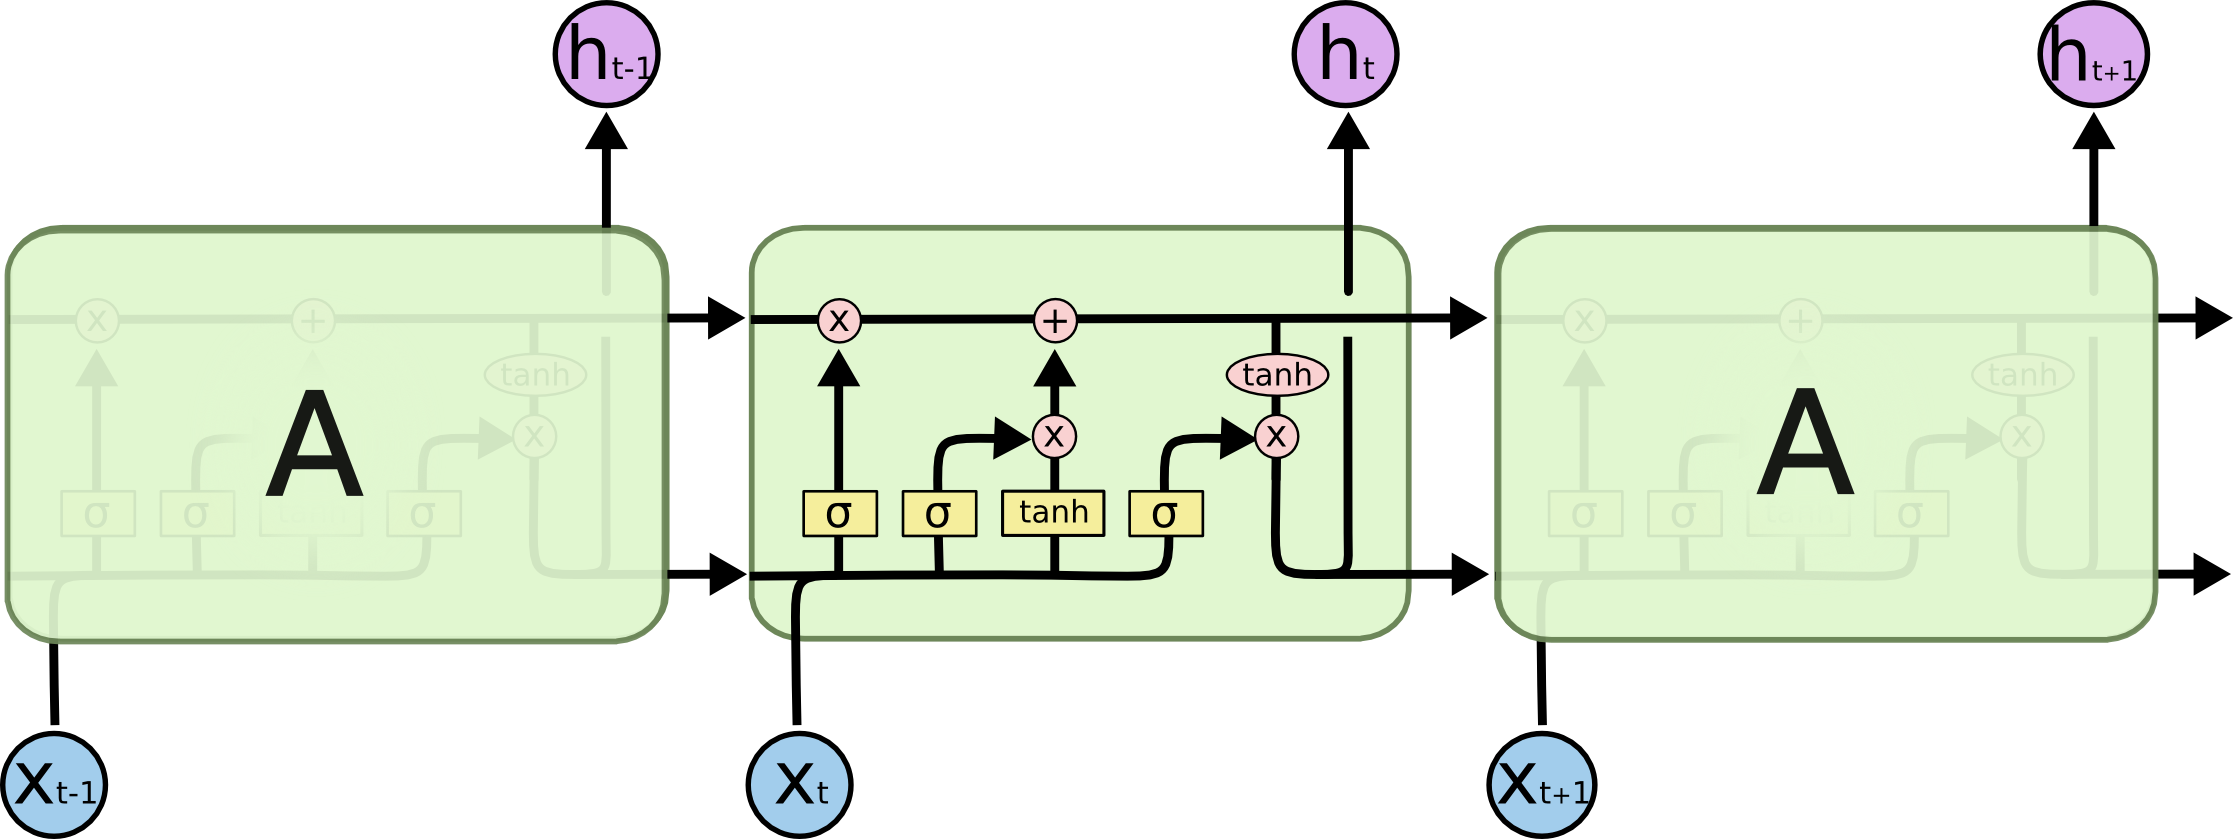

**Hình 4:** Sự lặp lại kiến trúc module trong mạng LSTM chứa 4 tầng ẩn (3 sigmoid và 1 tanh) tương tác

## **4. Ý tưởng đằng sau LSTM**

Ý tưởng chính của LSTM là thành phần ô trạng thái (cell state) được thể hiện qua đường ngang qua đỉnh đồ thị như hình vẽ:

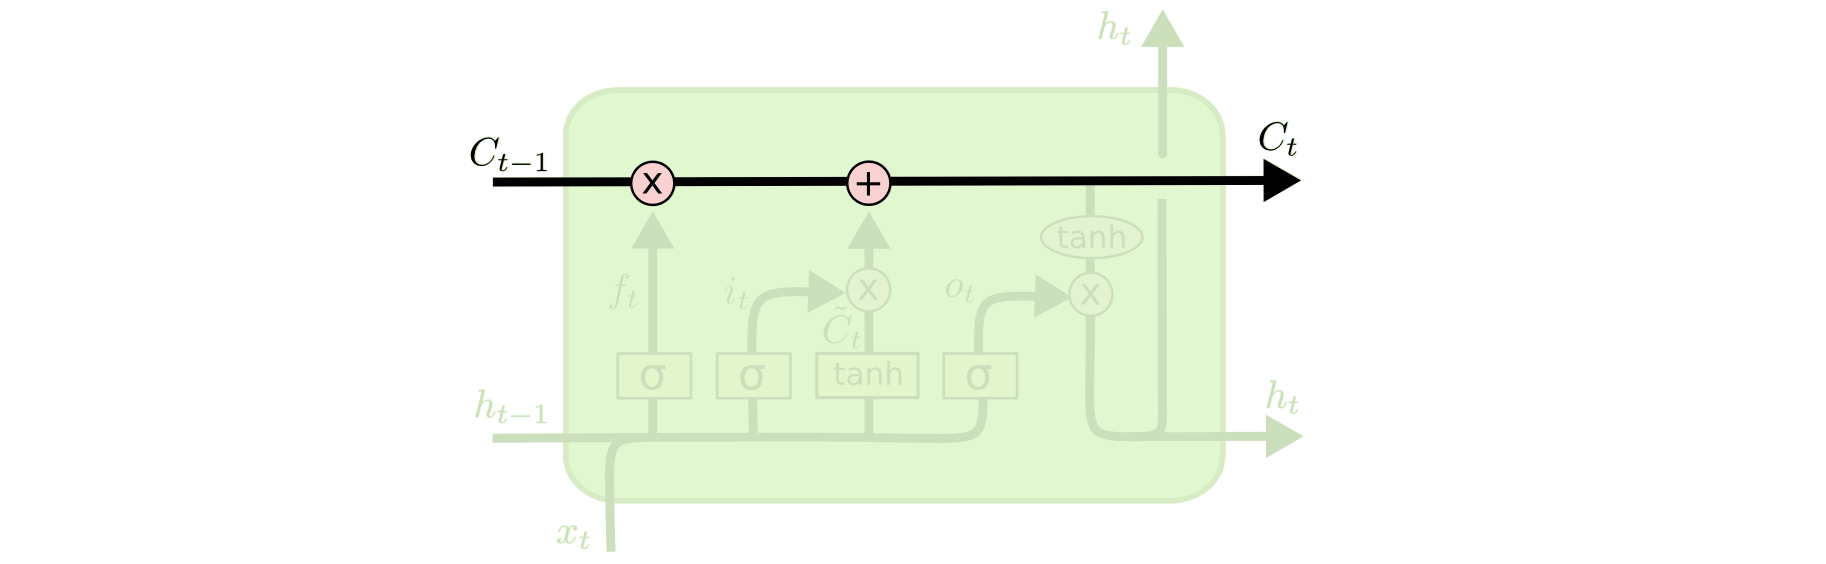

**Hình 6:** Đường đi của ô trạng thái (cell state) trong mạng LSTM

Ô trạng thái là một dạng băng chuyền chạy thẳng xuyên suốt toàn bộ chuỗi với chỉ một vài tương tác tuyến tính nhỏ giúp cho thông tin có thể truyền dọc theo đồ thị mạng nơ ron ổn định.

LSTM có khả năng xóa và thêm thông tin vào ô trạng thái và điều chỉnh các luồng thông tin này thông qua các cấu trúc gọi là cổng.

Cổng là cơ chế đặc biệt để điều chỉnh luồng thông tin đi qua. Chúng được tổng hợp bởi một tầng ẩn của hàm activation sigmoid và với một toán tử nhân như đồ thị.

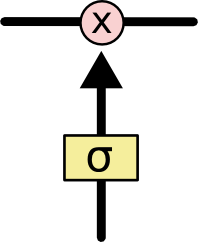

**Hình 7:** Một cổng của hàm sigmoid trong LSTM

Hàm sigmoid sẽ cho ra các giá trị xác xuất nằm trong khoảng từ 0 đến 1, thể hiện rằng có bao nhiêu phần thông tin sẽ đi qua cổng. Giá trị bằng 0 ngụ ý rằng không cho phép thông tin nào đi qua, giá trị bằng 1 cho toàn bộ đi qua.

Một mạng LSTM ẽ có 3 cổng có kiến trúc dạng này để bảo vệ và kiểm soát các ô trạng thái.

## **5. Thứ tự các bước của LSTM**

**Bước 1:** Bước đầu tiên trong LSTM sẽ quyết định xem thông tin nào chúng ta sẽ cho phép đi qua ô trạng thái (cell state). Nó được kiểm soát bởi hàm sigmoid trong một tầng gọi là tầng cổng quên (forget gate layer). Đầu tiên nó nhận đầu vào là 2 giá trị $h_{t-1}$ và $x_t$ rồi đưa ra kết quả là một số trong [0,1] cho mỗi số trong trạng thái tế bào $C_{t-1}$. Đầu ra là 1 thể hiện rằng nó giữ toàn bộ thông tin, còn 0 chỉ rằng toàn bộ thông tin bị bỏ đi.

Trở lại ví dụ về ngôn ngữ, chúng ta cố gắng dự đoán từ tiếp theo dựa trên toàn bộ những từ trước đó. Ô trạng thái có thể bao gồm ô trạng thái của chủ nghĩa hiện tại, để cho đại từ ở câu tiếp theo sử dụng chính xác. Chẳng hạn như chúng ta đang mô tả về một người bạn là con trai thì các đại từ nhân xưng ở tiếp theo phải là anh, thằng, hắn thay vì cô. Tuy nhiên chủ ngữ không phải khi nào cũng cố định. Khi chúng ta nhìn thấy một chủ ngữ mới, chúng ta muốn quên đi loại của một chủ ngữ cũ. Do đó tầng quên cho phép cập nhật thông tin mới và lưu giữ giá trị của nó khi có thay đổi theo thời gian.

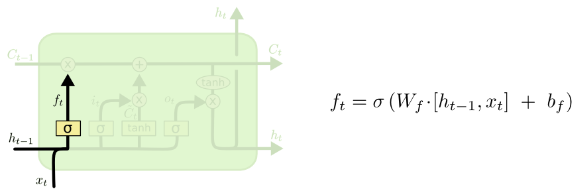

**Hình 8: Tầng cổng quên (forget gate layer)**

**Bước 2:** Bước tiếp theo chúng ta sẽ quyết định loại thông tin nào sẽ được lưu trữ trong ô trạng thái. Bước này gồm 2 phần. Phần đầu tiên là một tầng ẩn của hàm sigmoid được gọi là tầng cổng vào (input gate layer) quyết định giá trị bao nhiêu sẽ được cập nhật. Tiếp theo, tầng ẩn hàm tanh sẽ tạo ra một vector của một giá trị trạng thái mới $\~{C_t}$ mà có thể được thêm vào trạng thái. Tiếp theo kết hợp giữa 2 tầng này để tạo ra một cập nhật cho trạng thái.

Trong ví dụ của mô hình ngôn ngữ, chúng ta muốn thêm loại của một chủ ngữ mới vào ô trạng thái để thay thế phần trạng thái cũ muốn quên đi.

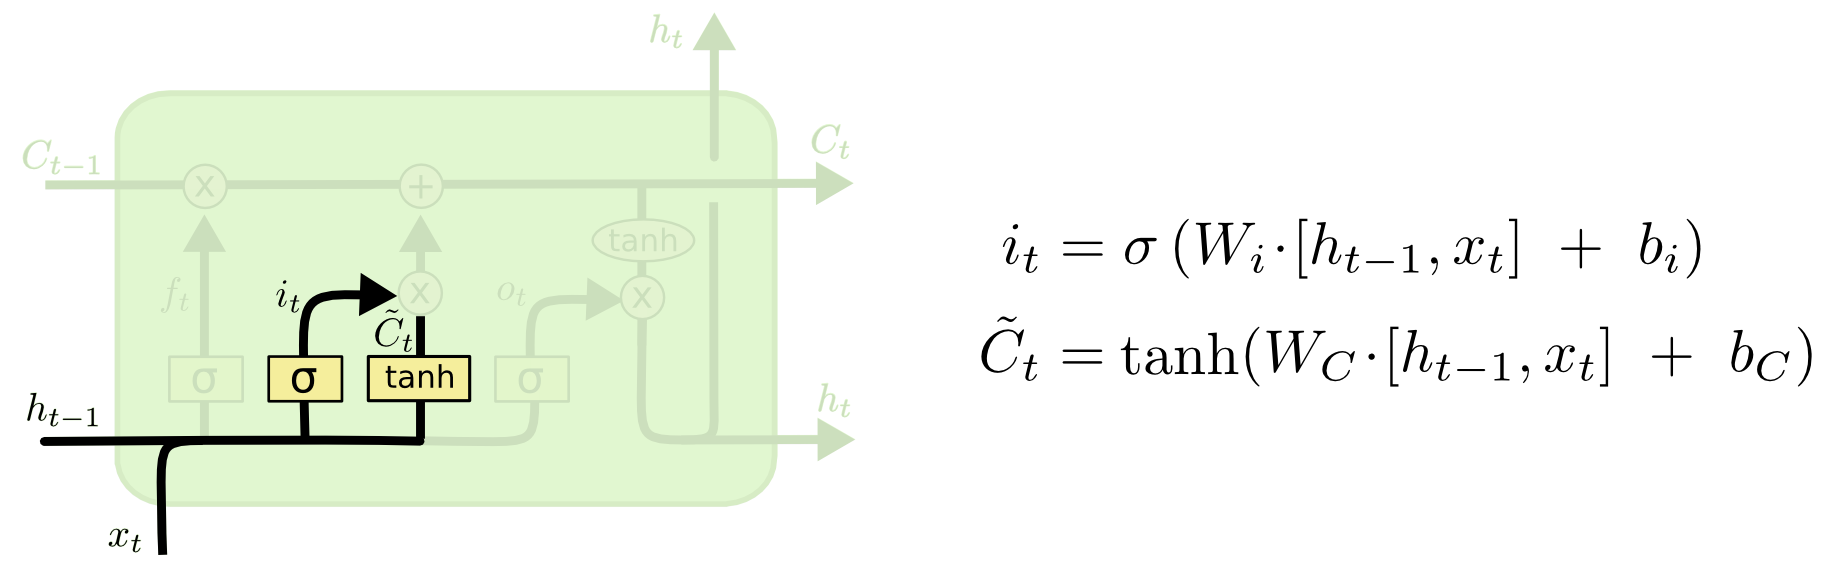

**Hình 9: Cập nhật giá trị cho ô trạng thái bằng cách kết hợp 2 kết quả từ tầng cổng vào và tẩng ẩn hàm tanh**

Bước 3: Đây là thời điểm cập nhật ô trạng thái $C_t$ sang một trạng thái mới $C_t$. Những bước trước đó đã quyết định làm cái gì và bước này là thực hiện nó.

Chúng ta nhân trạng thái cũ với $f_t$ tương ứng với việc quên những thứ quyết định được phép quên sớm. Phần tử đề cử $i_t*\~{C_t}$ là một giá trị mới được tính toán tương ứng với bao nhiêu được cập nhật vào mỗi giá trị trạng thái.


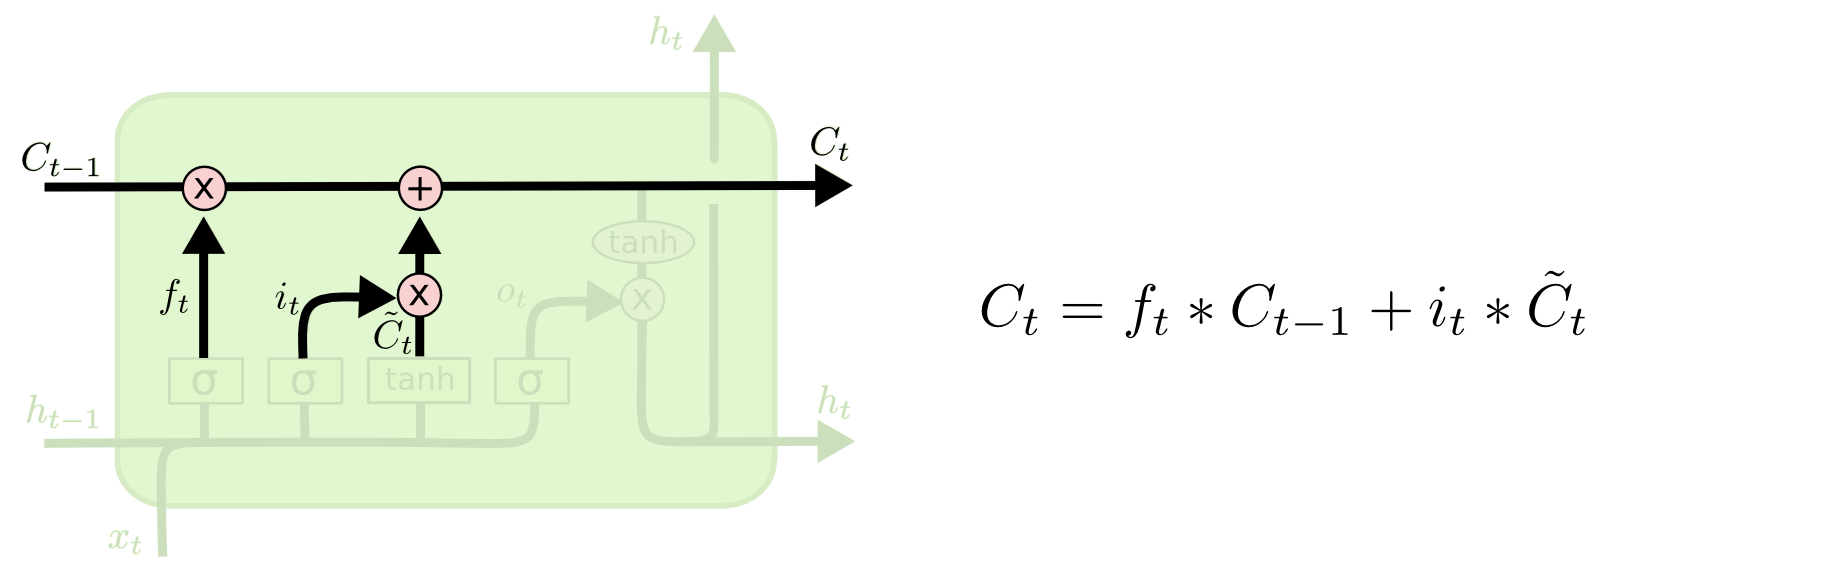

**Hình 10: Ô trạng thái mới**

**Bước 4:** Cuối cùng cần quyết định xem đầu ra sẽ trả về bao nhiêu. Kết quả ở đầu ra sẽ dựa trên ô trạng thái, nhưng sẽ là một phiên bản được lọc. Đầu tiên, chúng ta chạy qua tầng sigmoid  nơi quyết định phần nào của ô trạng thái sẽ ở đầu ra. Sau đó, ô trạng thái được đưa qua hàm tanh (để chuyển giá trị về khoảng -1 và 1) và nhân nó với đầu ra của một cổng sigmoid, do đó chỉ trả ra phần mà chúng ta quyết định.

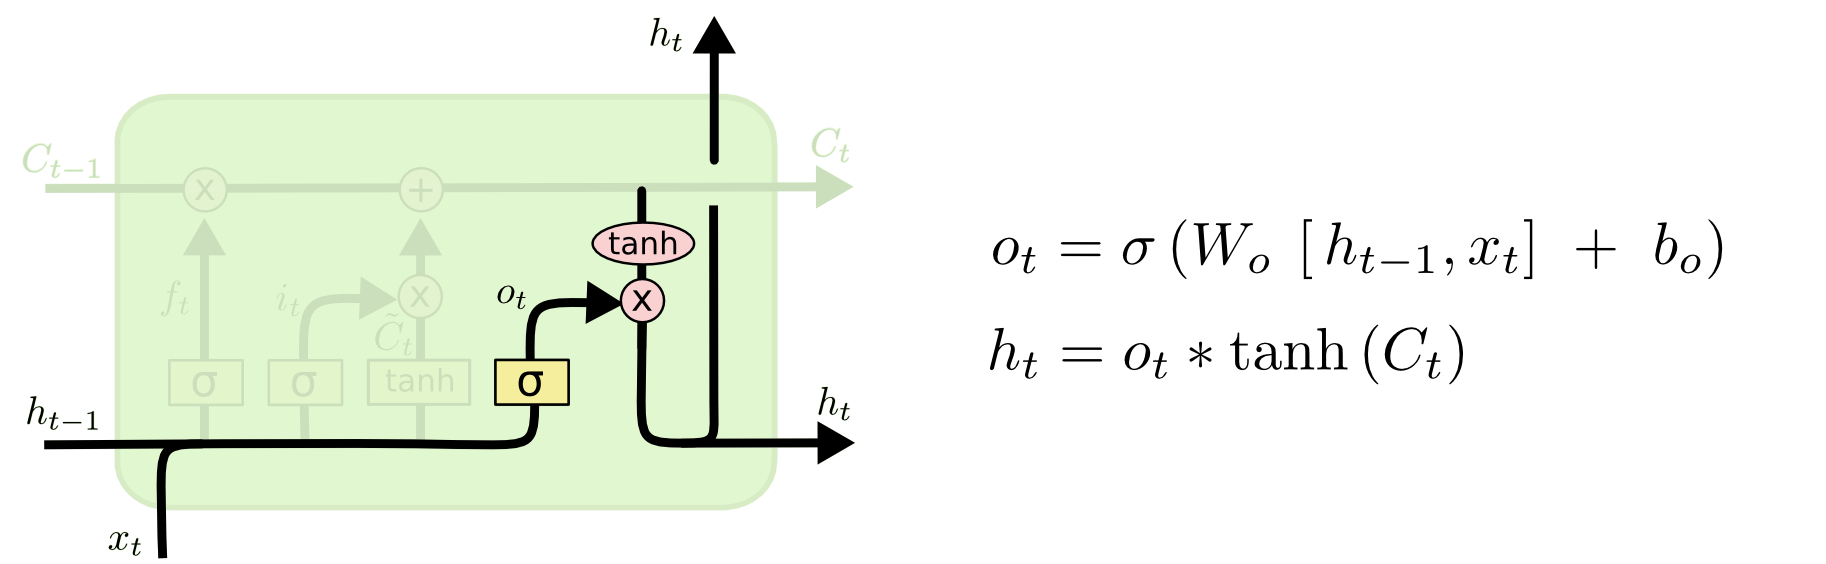

**Hình 11: Điều chỉnh thông tin ở đầu ra thông qua hàm tanh**

## **6. Các biến thể của LSTM**

Một trong những biến thể nối tiếng nhất của LSTM được giới thiệu bởi Gers & Schmidhuber (2000) thêm một kết nối ống tiểu (peehole connection) để các cổng có thể kết nối trực tiếp đến các ô trạng thái.

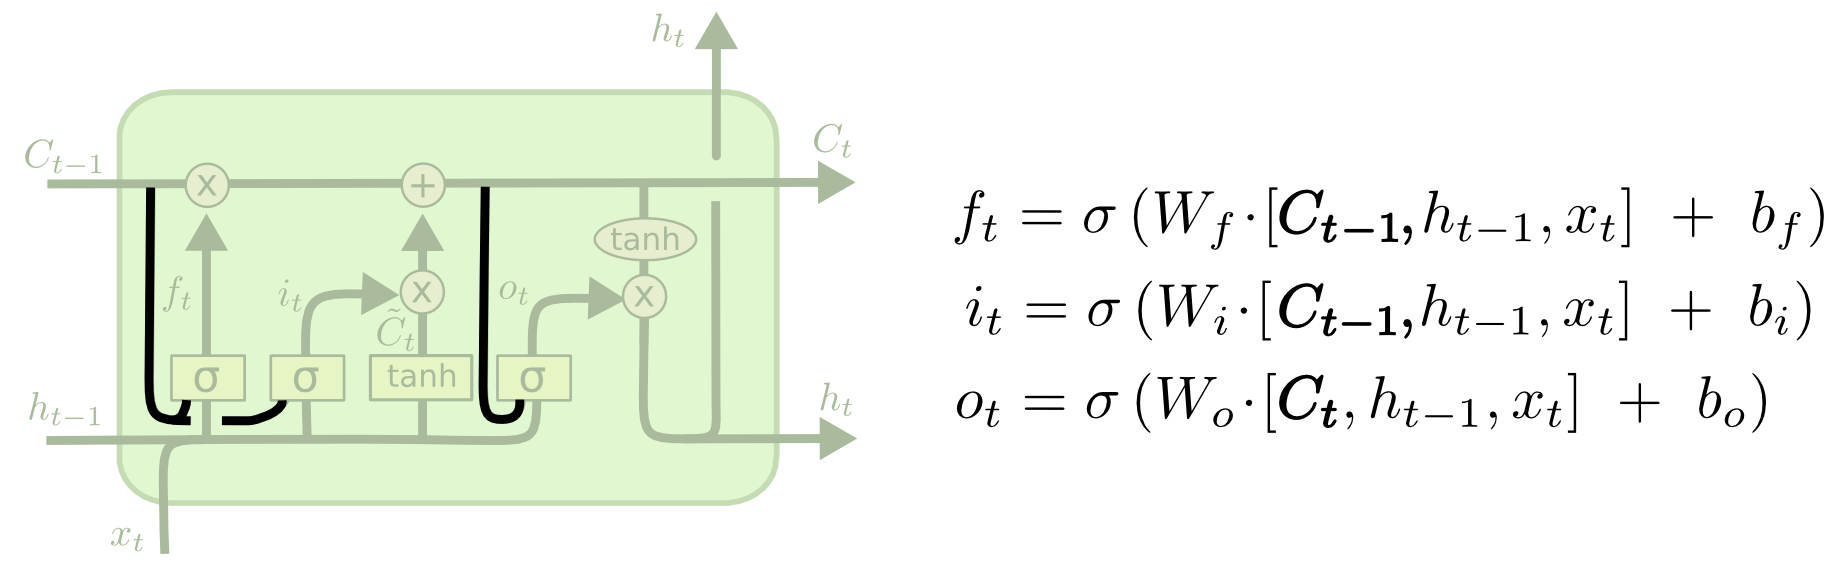

**Hình 12: Kết nối ống tiểu (peehole) liên kết trực tiếp ô trạng thái với các cổng**

Một biến thể khác là sử dụng cặp đôi cổng vào và cổng ra. Thay vì quyết định riêng rẽ bỏ qua thông tin nào và thêm mới thông tin nào, chúng ta sẽ quyết định chúng đồng thời. Các thông tin chỉ bị quên khi chúng ta muốn cập nhập vào một vài thông tin mới.

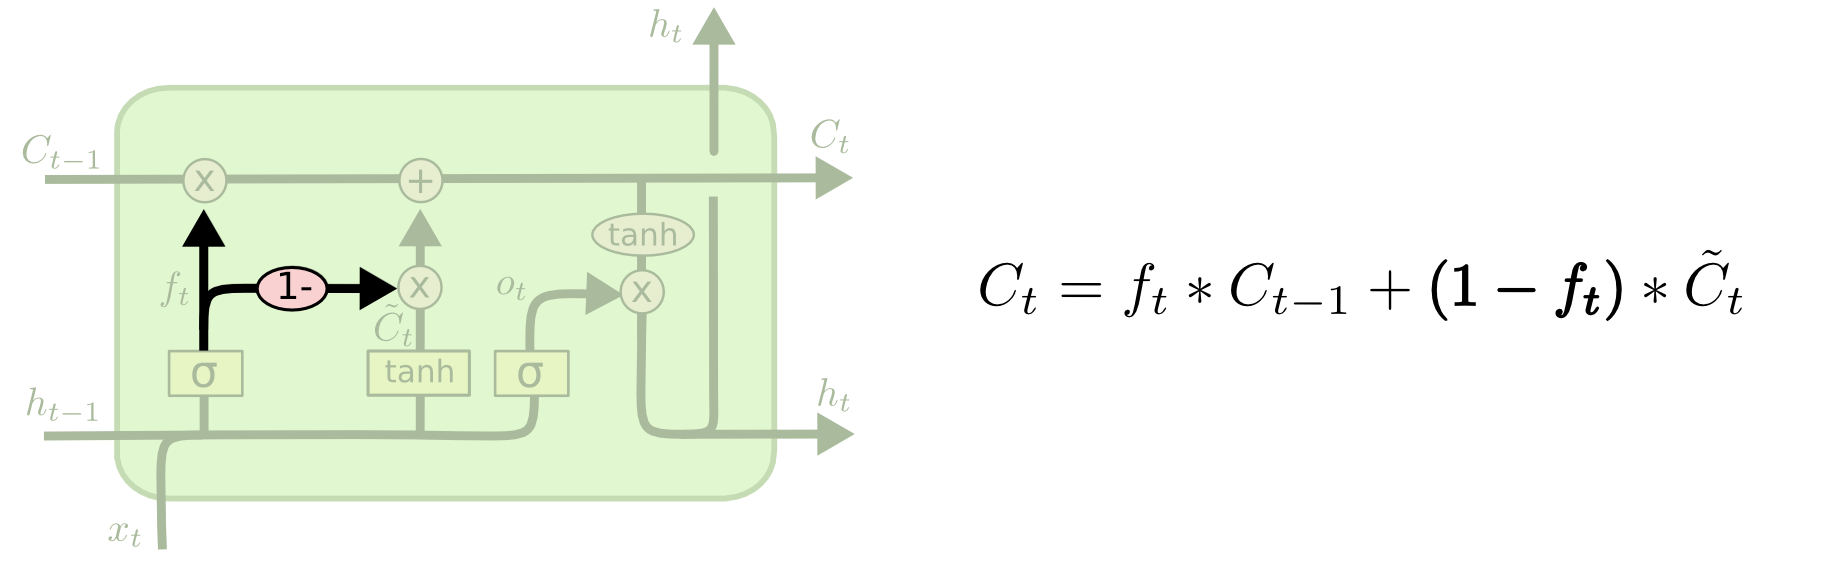

**Hình 13: Cấu trúc điều chỉnh thêm mới và bỏ qua thông tin đồng thời**

Một dạng biến thể khá mạnh khác của LSTM là cổng truy hồi đơn vị (Gated Recurrent Unit - GRU) được giới thiệu bởi Cho, et al. (2014). Nó kết hợp cổng quên và cổng vào thành một cổng đơn gọi là cập nhật (update gate). Nó cũng nhập các ô trạng thái và trạng thái ẩn và thực hiện một số thay đổi khác. Kết quả của mô hình đơn giản hơn nhiều so với mô hình LSTM chuẩn, và đã trở nên khá phổ biến.

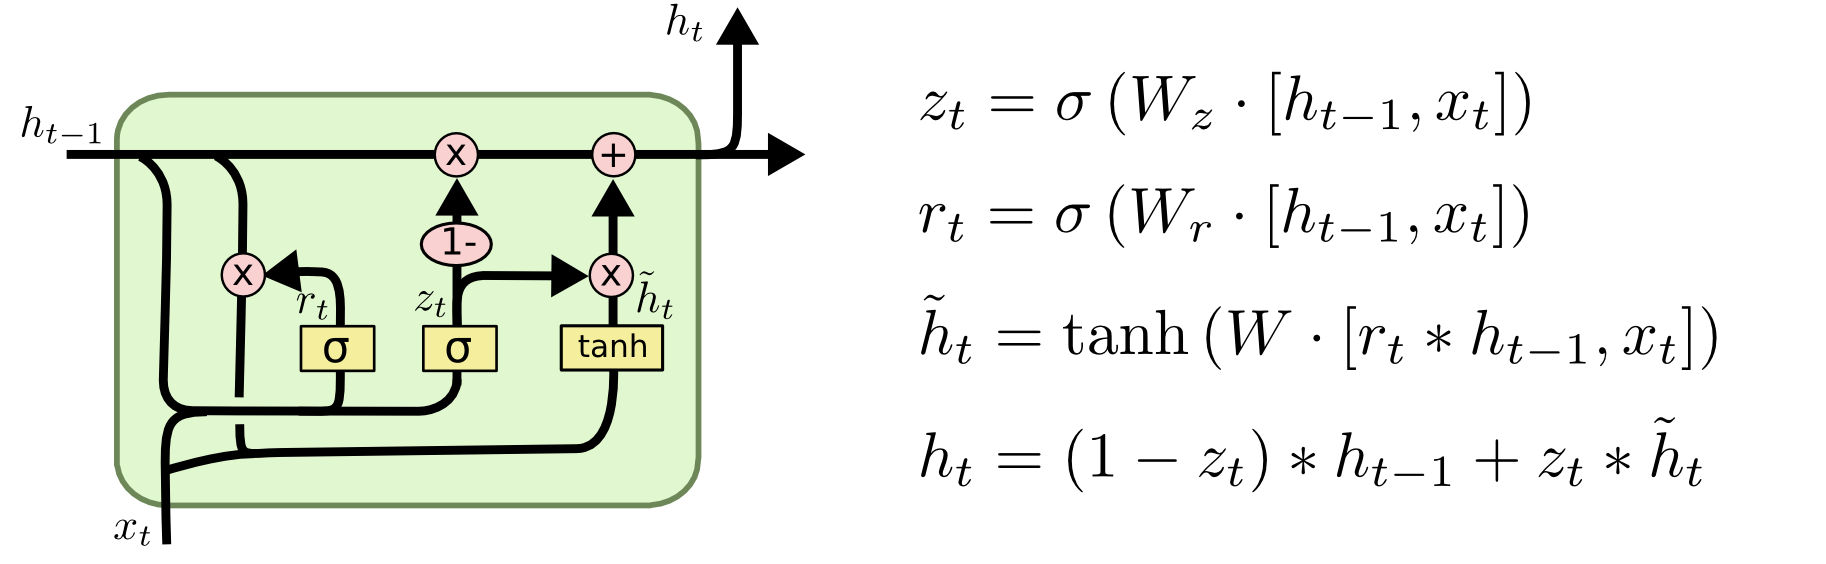

**Hình 14: Cấu trúc cổng truy hồi đơn vị (GRU - Gated Recurrent Unit)**

## **7. Thực hành mô hình sinh từ tự động**


### **7.1 Xây dựng mô hình trên level kí tự**

**Bài toán:** Dự báo từ tiếp theo của một đoạn hoặc câu văn dựa vào bối cảnh của từ là những từ liền trước nó.

**Dataset:** bộ truyện alice ở xứ sở kỳ diệu

In [15]:
import numpy 
import tensorflow.keras as keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
import os

filename = 'wonderland.txt'
raw_text = open(filename).read().lower()

Một dictionary gồm 59 kí tự được sử dụng để mã hóa các kí tự trong bộ truyện. Sử dụng one-hot encoding để mã hóa, các phần tử là các ký tự.

In [16]:
chars = sorted(list(set(raw_text)))
char_to_int = dict((c,i) for i,c in enumerate(chars))
print('number of letters: ', len(char_to_int))
print(char_to_int)

number of letters:  46
{'\n': 0, ' ': 1, '!': 2, '"': 3, "'": 4, '(': 5, ')': 6, '*': 7, ',': 8, '-': 9, '.': 10, '0': 11, '3': 12, ':': 13, ';': 14, '?': 15, '[': 16, ']': 17, '_': 18, '`': 19, 'a': 20, 'b': 21, 'c': 22, 'd': 23, 'e': 24, 'f': 25, 'g': 26, 'h': 27, 'i': 28, 'j': 29, 'k': 30, 'l': 31, 'm': 32, 'n': 33, 'o': 34, 'p': 35, 'q': 36, 'r': 37, 's': 38, 't': 39, 'u': 40, 'v': 41, 'w': 42, 'x': 43, 'y': 44, 'z': 45}


Chuẩn hóa dữ liệu giảm thiểu nhiễu và số lượng các khả năng có thể ở đầu ra. Điều này giúp cải thiện chất lượng và độ chính xác trong dự báo cảu mô hình. Các bước chuẩn hóa dữ liệu;
1. Chỉ giữ lại các kí tự chữ.
2. Chỉ giữ lại các dấu câu `. ! ?` vì chúng thể hiện các loại câu và ảnh hưởng đến từ tiếp theo khi dự báo. 
3. Giữ lại các dấu `, ' '` vì chúng giúp tách các từ và tách các thành phần câu.
4. Chuẩn hóa lại các các chữ số về 1 chữ số duy nhất là 0 vì các con số là ngẫu nhiên và không dự báo được. Chúng ta chỉ có thể dự báo ở vị trí nào có khả năng là số.
5. Các kí tự nằm ngoài só liệt kê trên sẽ đưa vào nhóm `unk` tức unknown

In [18]:
import string
string.ascii_lowercase
chars_new = list(string.ascii_lowercase) + ['0', '.', ',', ' ', '!', '?', 'unk']
chars_to_int = dict((v,k) for k,v in enumerate(chars_new))
int_to_chars = dict((k,v) for k,v in enumerate(chars_new))
print('character to int:', chars_to_int)
print('int to character:', int_to_chars)

character to int: {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25, '0': 26, '.': 27, ',': 28, ' ': 29, '!': 30, '?': 31, 'unk': 32}
int to character: {0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: 'h', 8: 'i', 9: 'j', 10: 'k', 11: 'l', 12: 'm', 13: 'n', 14: 'o', 15: 'p', 16: 'q', 17: 'r', 18: 's', 19: 't', 20: 'u', 21: 'v', 22: 'w', 23: 'x', 24: 'y', 25: 'z', 26: '0', 27: '.', 28: ',', 29: ' ', 30: '!', 31: '?', 32: 'unk'}


In [19]:
n_chars = len(raw_text)
n_vocab = len(chars_new)
print('Total characters: ', n_chars)
print('Total Vocab: ', n_vocab)


Total characters:  148574
Total Vocab:  33


In [23]:
def _encode_sen(text):
    text = text.lower()
    sen_vec = []
    for let in text:
        if let in chars_new[:-1]:
            idx = chars_to_int[let]
        else:
            idx = chars_to_int['unk']
        sen_vec.append(idx)
    return sen_vec

x_test = _encode_sen('Alice is a wonderful story. #')
print(x_test) 

[0, 11, 8, 2, 4, 29, 8, 18, 29, 0, 29, 22, 14, 13, 3, 4, 17, 5, 20, 11, 29, 18, 19, 14, 17, 24, 27, 29, 32]


In [24]:
def _decode_sen(vec):
    text = []
    for i in vec:
        let = int_to_chars[i]
        text.append(let)
    text = ''.join(text)
    return text

_decode_sen(x_test)

'alice is a wonderful story. unk'

Cần đồng nhất độ dài đầu vào cho mô hình cần tạo ra các chuỗi ký tự (window input) với độ dài là 100. Mục đích chúng ta là dự báo ký tự tiếp theo từ 100 ký tự đầu vào.

## **References:**

1. https://colah.github.io/posts/2015-08-Understanding-LSTMs/
2. https://phamdinhkhanh.github.io/2019/04/22/Ly_thuyet_ve_mang_LSTM.html